In [1]:
!python --version
# In case issues with installation of tensortrade, Install the version below using that way
# https://github.com/tensortrade-org/tensortrade/issues/229#issuecomment-633164703
# version: https://github.com/tensortrade-org/tensortrade/releases/tag/v1.0.3

Python 3.7.5


In [3]:
!pip install -U tensortrade==1.0.3 ta matplotlib tensorboardX scikit-learn

  Using cached tensortrade-1.0.3-py3-none-any.whl


In [4]:
from tensortrade.data.cdd import CryptoDataDownload
import pandas as pd

In [5]:
import tensortrade.version
print(tensortrade.__version__)

1.0.3


In [7]:
import random

import ta
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import tensortrade.env.default as default
from tensortrade.feed.core import Stream, DataFeed, NameSpace
from tensortrade.oms.exchanges import Exchange
from tensortrade.oms.services.execution.simulated import execute_order
from tensortrade.oms.instruments import USD, BTC, ETH
from tensortrade.oms.wallets import Wallet, Portfolio
from tensortrade.agents import A2CAgent
import tensortrade.stochastic as sp 
from tensortrade.oms.instruments import Instrument
from tensortrade.env.default.actions import SimpleOrders, BSH, ManagedRiskOrders
from collections import OrderedDict
from tensortrade.oms.orders.criteria import Stop, StopDirection
from tensortrade.env.default.actions import ManagedRiskOrders
from tensortrade.env.default.rewards import RiskAdjustedReturns
from scipy.signal import savgol_filter

In [8]:
def fetchTaFeatures(data):
    data = ta.add_all_ta_features(data, 'open', 'high', 'low', 'close', 'volume', fillna=True)
    data.columns = [name.lower() for name in data.columns]
    return data

def createEnv(config):

    coins = ["coin{}".format(x) for x in range(5)]
    bitfinex_streams = []

    with NameSpace("bitfinex"):
        for coin in coins:
            coinColumns = filter(lambda name: name.startswith(coin), config["data"].columns)
            bitfinex_streams += [
                Stream.source(list(config["data"][c]), dtype="float").rename(c) for c in coinColumns
            ]


    feed = DataFeed(bitfinex_streams)
    
    streams = []
    for coin in coins:
         streams.append(Stream.source(list(data[coin+":"+"close"]), dtype="float").rename("USD-"+coin))
    streams = tuple(streams)


    bitstamp = Exchange("bitfinex", service=execute_order)(
        Stream.source(list(data["coin0:close"]), dtype="float").rename("USD-BTC"),
        Stream.source(list(data["coin1:close"]), dtype="float").rename("USD-ETH"),
        Stream.source(list(data["coin1:close"]), dtype="float").rename("USD-TTC1"),
        Stream.source(list(data["coin3:close"]), dtype="float").rename("USD-TTC2"),
        Stream.source(list(data["coin4:close"]), dtype="float").rename("USD-TTC3"),
        Stream.source(list(data["coin5:close"]), dtype="float").rename("USD-TTC4"),
        Stream.source(list(data["coin6:close"]), dtype="float").rename("USD-TTC5"),
        Stream.source(list(data["coin7:close"]), dtype="float").rename("USD-TTC6"),
        Stream.source(list(data["coin8:close"]), dtype="float").rename("USD-TTC7"),
        Stream.source(list(data["coin9:close"]), dtype="float").rename("USD-TTC8"),

    )
    
    TTC1 = Instrument("TTC1", 8, "TensorTrade Coin1")
    TTC2 = Instrument("TTC2", 8, "TensorTrade Coin2")
    TTC3 = Instrument("TTC3", 8, "TensorTrade Coin3")
    
    TTC4 = Instrument("TTC4", 8, "TensorTrade Coin4")
    TTC5 = Instrument("TTC5", 8, "TensorTrade Coin5")
    TTC6 = Instrument("TTC6", 8, "TensorTrade Coin6")
    
    TTC7 = Instrument("TTC7", 8, "TensorTrade Coin7")
    TTC8 = Instrument("TTC8", 8, "TensorTrade Coin8")
    
    cash = Wallet(bitstamp, 10000 * USD)
    asset = Wallet(bitstamp, 0 * BTC)
    asset1 = Wallet(bitstamp, 0 * ETH)
    
    asset2 = Wallet(bitstamp, 0 * TTC1)
    asset3 = Wallet(bitstamp, 0 * TTC2)
    asset4 = Wallet(bitstamp, 0 * TTC3)
    
    asset5 = Wallet(bitstamp, 0 * TTC4)
    asset6 = Wallet(bitstamp, 0 * TTC5)
    asset7 = Wallet(bitstamp, 0 * TTC6)
    
    asset8 = Wallet(bitstamp, 0 * TTC7)
    asset9 = Wallet(bitstamp, 0 * TTC8)

    portfolio = Portfolio(USD, [cash, asset, asset1, asset2, asset3, asset4, asset5, asset6, asset7, asset8, asset9
        
    ])

    portfolio = Portfolio(USD, [cash, asset, asset1     
    ])
    reward = RiskAdjustedReturns(return_algorithm = "sortino", window_size=300)
    action_scheme = ManagedRiskOrders(stop=[0.1], take=[0.05, 0.1, 0.04], trade_sizes=[5])
    env = default.create(
      feed=feed,
      portfolio=portfolio,
      action_scheme=action_scheme,
      reward_scheme=reward,
      window_size=config["window_size"]
    )
    
    return env


In [9]:
coins = ["coin{}".format(x) for x in range(10)]
dfs = []
funcs = [sp.gbm, sp.heston]
for coin in coins:
    df = funcs[random.randint(0, 1)](
    base_price=random.randint(1, 2000),
    base_volume=random.randint(10, 5000),
    start_date="2010-01-01",
    times_to_generate=5000,
    time_frame='1H').add_prefix(coin+":")
    for column in ["close", "open", "high", "low"]:
        df[coin+f":diff_{column}"] = df[coin+f":{column}"].apply(np.log).diff().dropna()
        df[coin+f":soft_{column}"] = savgol_filter(df[coin+":"+column], 35, 2)

    ta.add_all_ta_features(
    df,
    colprefix=coin+":",
    **{k: coin+":" + k for k in ['open', 'high', 'low', 'close', 'volume']})
    
    dfs.append(df)

data = pd.concat(dfs, axis=1)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning:

invalid value encountered in double_scalars

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning:

invalid value encountered in double_scalars

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning:

invalid value encountered in double_scalars

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning:

invalid value encountered in double_scalars

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning:

invalid value encountered in double_scalars

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning:

invalid value encountered in double_scalars

/Library/Frameworks/Python.framework/Versions/3.7/lib/pyth

In [10]:
scaler = MinMaxScaler()
norm_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
norm_data.to_csv("fake_data_1h_norm.csv", index=False)

In [11]:
config = {
            "window_size": 10,
            "data": norm_data
         }

env = createEnv(config)

In [12]:
!mkdir -p agents/

agent = A2CAgent(env)
reward = agent.train(n_steps=5000, save_path="agents/", n_episodes = 10)

====      AGENT ID: f2aef115-934c-4e97-be59-06b58bfc0f54      ====
====      EPISODE ID (1/10): e8bf2a2d-5b78-4dd6-b0b1-5b0722c531ed      ====
====      EPISODE ID (2/10): a7e0642c-f9fc-430f-9101-f948fb8cbfa0      ====


In [13]:
env = createEnv({
    "window_size": 10, 
    "data": norm_data
})

In [14]:
episode_reward = 0
done = False
obs = env.reset()

while not done:
    action = agent.get_action(obs)
    obs, reward, done, info = env.step(action)
    episode_reward += reward

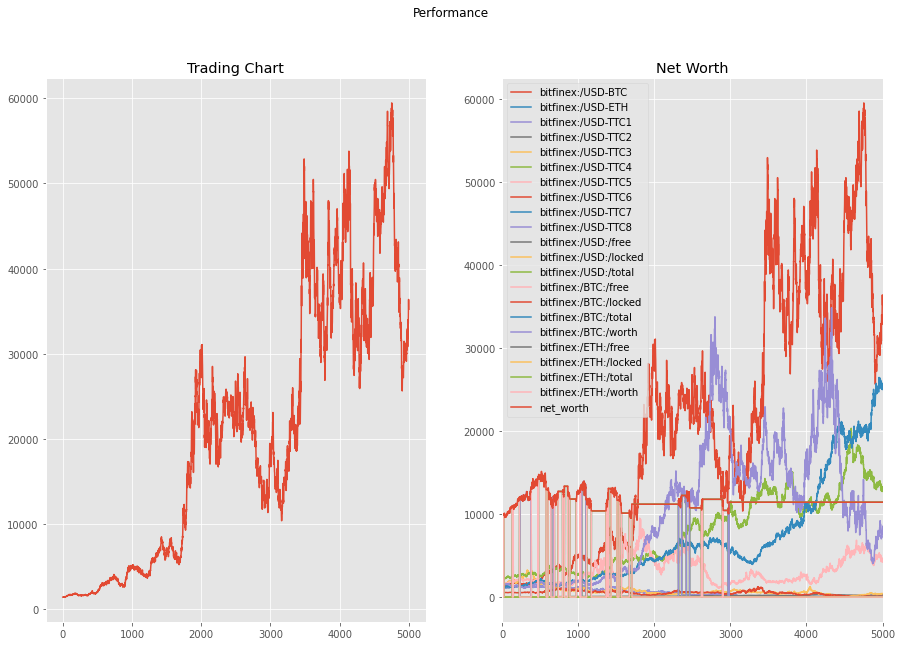

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

fig.suptitle("Performance")

axs[0].plot(np.arange(len(data["coin0:close"])), data["coin0:close"], label="price")
axs[0].set_title("Trading Chart")

performance_df = pd.DataFrame().from_dict(env.action_scheme.portfolio.performance, orient='index')
performance_df.plot(ax=axs[1])
axs[1].set_xlim(0, 5000)
axs[1].set_title("Net Worth")

plt.show()

In [16]:
orDict = OrderedDict()
for k in env.action_scheme.portfolio.performance.keys():
    orDict[k] = env.action_scheme.portfolio.performance[k]["net_worth"]

<AxesSubplot:>

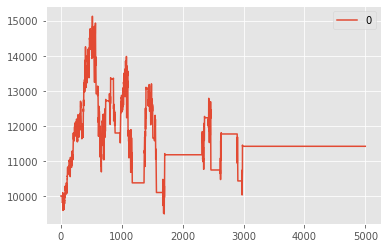

In [17]:
pd.DataFrame().from_dict(orDict, orient='index').plot()